In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
data = pd.read_csv('train/train.csv')
data.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [3]:
len(data)

19579

In [4]:
data.author.value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

# POS Tagging

In [5]:
def get_tag_freq(df,col):
# tags each sentence and produces tag freqs
    freq_list = []
    for text in df[col]:
        toks = nltk.word_tokenize(text)
        tag_toks = nltk.pos_tag(toks)
        freq_dist = nltk.FreqDist(tag for (word, tag) in tag_toks)
        freq_list.append(freq_dist)
    return freq_list

def get_corpus_tags(freq_list):
# gets the list of all tags in corpus
    tag_keys = []
    for dist in freq_dists:
        keys = set(dist.keys())
        for key in keys:
            tag_keys.append(key)

    return list(set(tag_keys))

def init_tag_cols(df,tag_name_list):
    df.loc[:,tag_name_list] = 0
    return df

def store_pos_freqs(df,dict_list):
    n = 0
    for freq_dict in dict_list:
        for key,val in freq_dict.items():
            df.loc[n,key] = val
        n+=1
    return df

In [6]:
freq_dists = get_tag_freq(data,'text')
tag_set = get_corpus_tags(freq_dists)
data = init_tag_cols(data,tag_set)
data = store_pos_freqs(data,freq_dists)
data = pd.concat([data,pd.get_dummies(data['author'],prefix='is_')],axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
auths = data.author.to_list()
auth_numcat = label_encoder.fit_transform(auths)
data['author_num'] = auth_numcat

data

,id,text,author,VBN,WP,MD,NNS,WRB,VBP,VBZ,...,JJR,NNPS,POS,PRP,WDT,PDT,is__EAP,is__HPL,is__MWS,author_num
0,id26305,"This process, however, afforded me no means of...",EAP,0,0,1,2,0,1,0,...,0,0,0,3,0,0,1,0,0,0
1,id17569,It never once occurred to me that the fumbling...,HPL,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,1,0,1
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,0,0,0,1,0,0,0,...,0,0,0,2,1,0,1,0,0,0
3,id27763,How lovely is spring As we looked from Windsor...,MWS,1,0,0,4,1,1,1,...,1,0,0,1,0,0,0,0,1,2
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,0,0,0,1,0,0,2,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,2,0,1,0,0,0,0,...,0,0,0,4,0,0,1,0,0,0
19575,id08973,The lids clenched themselves together as if in...,EAP,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,0,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
19577,id17513,"For an item of news like this, it strikes us i...",EAP,1,0,0,0,0,0,1,...,0,0,0,3,0,0,1,0,0,0


C:\Users\Patrick\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0.5, 0, 'VBN'),
 Text(1.5, 0, 'WP'),
 Text(2.5, 0, 'MD'),
 Text(3.5, 0, 'NNS'),
 Text(4.5, 0, 'WRB'),
 Text(5.5, 0, 'VBP'),
 Text(6.5, 0, 'VBZ'),
 Text(7.5, 0, 'IN'),
 Text(8.5, 0, 'UH'),
 Text(9.5, 0, '``'),
 Text(10.5, 0, 'NNP'),
 Text(11.5, 0, 'JJ'),
 Text(12.5, 0, 'RBR'),
 Text(13.5, 0, 'FW'),
 Text(14.5, 0, 'PRP$'),
 Text(15.5, 0, 'JJS'),
 Text(16.5, 0, 'TO'),
 Text(17.5, 0, 'WP$'),
 Text(18.5, 0, 'DT'),
 Text(19.5, 0, 'RP'),
 Text(20.5, 0, 'RBS'),
 Text(21.5, 0, 'VBG'),
 Text(22.5, 0, 'VBD'),
 Text(23.5, 0, 'VB'),
 Text(24.5, 0, ','),
 Text(25.5, 0, 'NN'),
 Text(26.5, 0, '.'),
 Text(27.5, 0, 'RB'),
 Text(28.5, 0, 'CC'),
 Text(29.5, 0, ':'),
 Text(30.5, 0, 'CD'),
 Text(31.5, 0, 'EX'),
 Text(32.5, 0, "''"),
 Text(33.5, 0, 'JJR'),
 Text(34.5, 0, 'NNPS'),
 Text(35.5, 0, 'POS'),
 Text(36.5, 0, 'PRP'),
 Text(37.5, 0, 'WDT'),
 Text(38.5, 0, 'PDT'),
 Text(39.5, 0, 'is__EAP'),
 Text(40.5, 0, 'is__HPL'),
 Text(41.5, 0, 'is__MWS')]

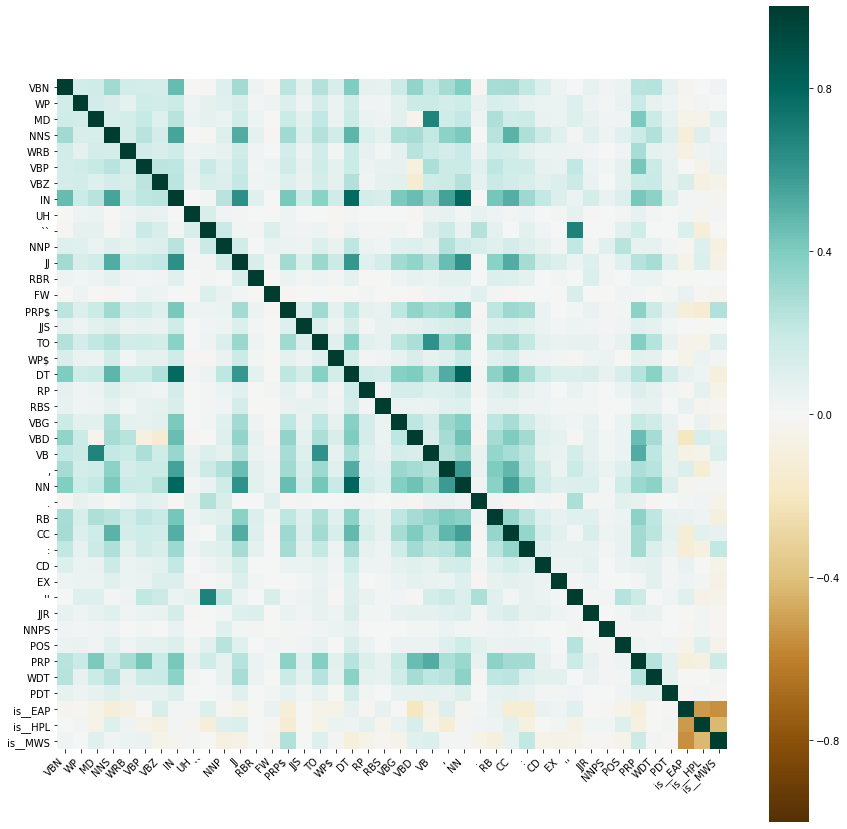

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.loc[:,data.columns[3:-1]].corr()

fig, ax = plt.subplots(figsize=(15,15))

ax = sns.heatmap(corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 cmap='BrBG',
                 square=True)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

# LDA

In [9]:
import gensim
from gensim.models.coherencemodel import CoherenceModel

en_stop = nltk.corpus.stopwords.words('english')
new_stops = ['’','``','.','"',',',"''","'",'?',';',"n't","'s",':']

for stop in new_stops:
    en_stop.append(stop)

print('length of en_stop: ', str(len(en_stop)))
# tokenization step for lda
def prepare_text_for_lda(text):
    tokens = nltk.word_tokenize(text,language='english')
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token not in en_stop]
    return tokens

# coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=dictionary,
                                              num_topics=num_topics,
                                              passes=15,
                                              random_state=np.random.RandomState(seed=42),
                                              minimum_probability=0.05)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

length of en_stop:  191


In [10]:
# prepare ze tokens
text_values = data.text
tok_docs = []

for text in text_values:
    tokens = prepare_text_for_lda(text)
    tok_docs.append(tokens)

In [11]:
from gensim import corpora

# Gensim functions creating vocab and bog of words documents
dictionary = corpora.Dictionary(tok_docs)
corpus = [dictionary.doc2bow(doc) for doc in tok_docs]

# run to estimate best k
model_list, coherence_values = compute_coherence_values(dictionary=dictionary,
                                                        corpus=corpus,
                                                        texts=tok_docs,
                                                        start=1,
                                                        limit=30,
                                                        step=1)

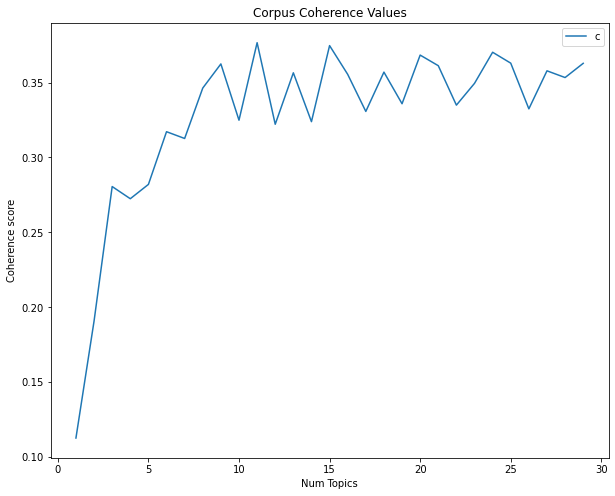

In [12]:
# Show graph
limit=30 
start=1 
step=1
x = range(start, limit, step)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x, coherence_values)
ax.set(xlabel='Num Topics',ylabel='Coherence score',title='Corpus Coherence Values')
plt.legend(("coherence_values"), loc='best')
plt.show()

In [13]:
ideal_k = np.argmax(coherence_values) + 1
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                            num_topics=ideal_k,
                                            id2word=dictionary,
                                            passes=15,
                                            random_state=np.random.RandomState(seed=42))

topics = lda_model.print_topics(num_words=20)
print('num_topics = '+ str(ideal_k))
for topic in topics:
    print(topic)

num_topics = 11
(0, '0.011*"one" + 0.010*"door" + 0.007*"room" + 0.006*"found" + 0.006*"two" + 0.006*"made" + 0.006*"seemed" + 0.005*"back" + 0.004*"upon" + 0.004*"place" + 0.004*"must" + 0.004*"chamber" + 0.004*"escape" + 0.004*"far" + 0.004*"said" + 0.004*"house" + 0.003*"toward" + 0.003*"every" + 0.003*"floor" + 0.003*"open"')
(1, '0.009*"house" + 0.008*"minutes" + 0.007*"old" + 0.007*"like" + 0.006*"ice" + 0.006*"ye" + 0.005*"hideous" + 0.005*"lord" + 0.005*"family" + 0.005*"gilman" + 0.005*"son" + 0.005*"madness" + 0.005*"animal" + 0.005*"faint" + 0.004*"gigantic" + 0.004*"hear" + 0.004*"big" + 0.004*"voices" + 0.004*"dog" + 0.004*"remote"')
(2, '0.023*"upon" + 0.021*"eyes" + 0.011*"voice" + 0.008*"death" + 0.007*"face" + 0.007*"ever" + 0.007*"hand" + 0.007*"oh" + 0.006*"seemed" + 0.006*"countenance" + 0.006*"tears" + 0.006*"head" + 0.005*"heard" + 0.005*"spoke" + 0.005*"idris" + 0.005*"length" + 0.005*"words" + 0.005*"expression" + 0.005*"lips" + 0.005*"became"')
(3, '0.007*"time

In [14]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [15]:
def get_corpus_doc_topic_dists(corpus_collection,model):
# get each docs topic distributions    
    doc_topic_dists = []
    for doc in corpus_collection:
        doc_top_dist = model.get_document_topics(doc)
        doc_topic_dists.append(doc_top_dist)
    return doc_topic_dists

def get_topic_nums(doc_topic_dist):
# get the set of topic numbers in the lda model (works even if topics have 0 docs)
    for doc in docs_topics:
        topic_ns = [x for (x,y) in doc]
        topic_nums = set(topic_ns)
    return list(topic_nums)

def store_doc_topics(df,corpus_doc_topic_dists):
# store doc topic distribution values
    i = 0
    for item in corpus_doc_topic_dists:
        for (num,val) in item:
            topic_col = str(num)
            df.loc[i,topic_col] = val
        i+=1
    return df

C:\Users\Patrick\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
docs_topics = get_corpus_doc_topic_dists(corpus,lda_model)
# store topic numbers as cols in df
topic_nums_str = [str(x) for x in get_topic_nums(docs_topics)]
# initialize doc num cols with zero
data.loc[:,topic_nums_str] = 0
data = store_doc_topics(data,docs_topics)
data

C:\Users\Patrick\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,text,author,VBN,WP,MD,NNS,WRB,VBP,VBZ,...,1,2,3,4,5,6,7,8,9,10
0,id26305,"This process, however, afforded me no means of...",EAP,0,0,1,2,0,1,0,...,0.000000,0.000000,0.095090,0.000000,0.000000,0.553558,0.000000,0.000000,0.000000,0.318277
1,id17569,It never once occurred to me that the fumbling...,HPL,0,0,1,0,0,0,0,...,0.012992,0.170567,0.324717,0.012992,0.012992,0.012992,0.012992,0.012992,0.012992,0.400780
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,0,0,0,1,0,0,0,...,0.160692,0.113341,0.000000,0.000000,0.058258,0.261173,0.000000,0.000000,0.000000,0.275889
3,id27763,How lovely is spring As we looked from Windsor...,MWS,1,0,0,4,1,1,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.170156,0.000000,0.053446,0.743295,0.000000
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,0,0,0,1,0,0,2,...,0.000000,0.083444,0.228902,0.571631,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,2,0,1,0,0,0,0,...,0.343450,0.010106,0.010105,0.010106,0.322676,0.010106,0.253029,0.010105,0.010106,0.010106
19575,id08973,The lids clenched themselves together as if in...,EAP,0,0,0,1,0,0,0,...,0.022724,0.022724,0.022724,0.524126,0.022724,0.022728,0.022724,0.022726,0.022724,0.271355
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,0,0,0,1,0,0,1,...,0.015073,0.015073,0.015073,0.415431,0.015073,0.015073,0.015073,0.015073,0.015073,0.448915
19577,id17513,"For an item of news like this, it strikes us i...",EAP,1,0,0,0,0,0,1,...,0.015133,0.352078,0.015132,0.015133,0.182110,0.015132,0.015131,0.210787,0.149101,0.015132


C:\Users\Patrick\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Text(0.5, 0, 'VBN'),
 Text(1.5, 0, 'WP'),
 Text(2.5, 0, 'MD'),
 Text(3.5, 0, 'NNS'),
 Text(4.5, 0, 'WRB'),
 Text(5.5, 0, 'VBP'),
 Text(6.5, 0, 'VBZ'),
 Text(7.5, 0, 'IN'),
 Text(8.5, 0, 'UH'),
 Text(9.5, 0, '``'),
 Text(10.5, 0, 'NNP'),
 Text(11.5, 0, 'JJ'),
 Text(12.5, 0, 'RBR'),
 Text(13.5, 0, 'FW'),
 Text(14.5, 0, 'PRP$'),
 Text(15.5, 0, 'JJS'),
 Text(16.5, 0, 'TO'),
 Text(17.5, 0, 'WP$'),
 Text(18.5, 0, 'DT'),
 Text(19.5, 0, 'RP'),
 Text(20.5, 0, 'RBS'),
 Text(21.5, 0, 'VBG'),
 Text(22.5, 0, 'VBD'),
 Text(23.5, 0, 'VB'),
 Text(24.5, 0, ','),
 Text(25.5, 0, 'NN'),
 Text(26.5, 0, '.'),
 Text(27.5, 0, 'RB'),
 Text(28.5, 0, 'CC'),
 Text(29.5, 0, ':'),
 Text(30.5, 0, 'CD'),
 Text(31.5, 0, 'EX'),
 Text(32.5, 0, "''"),
 Text(33.5, 0, 'JJR'),
 Text(34.5, 0, 'NNPS'),
 Text(35.5, 0, 'POS'),
 Text(36.5, 0, 'PRP'),
 Text(37.5, 0, 'WDT'),
 Text(38.5, 0, 'PDT'),
 Text(39.5, 0, 'is__EAP'),
 Text(40.5, 0, 'is__HPL'),
 Text(41.5, 0, 'is__MWS'),
 Text(42.5, 0, 'author_num'),
 Text(43.5, 0, '0'),
 T

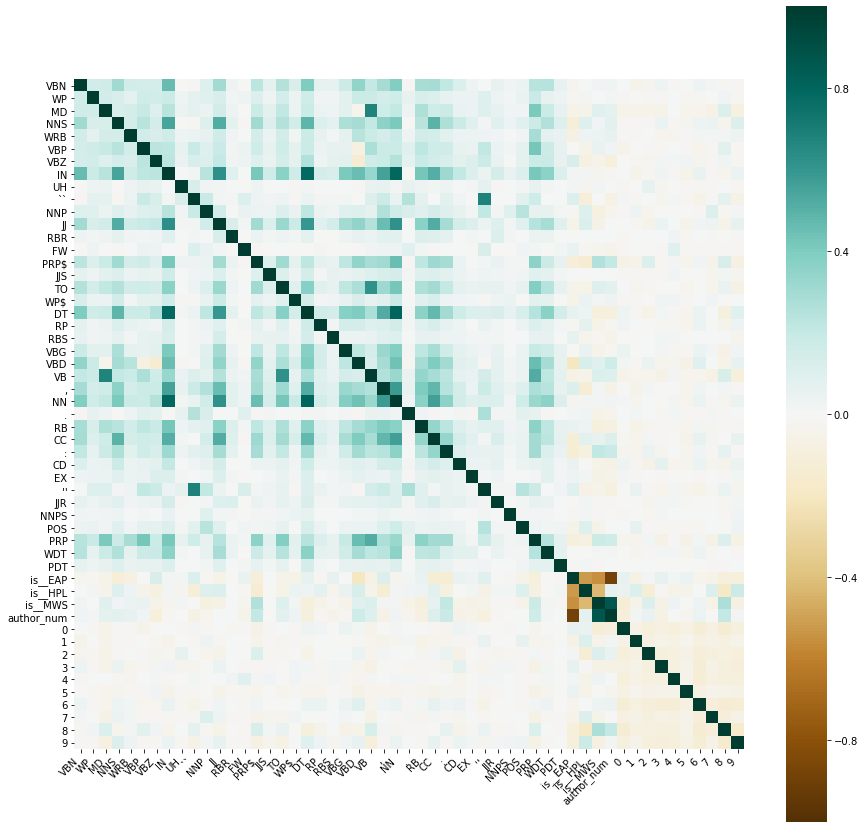

In [17]:
corr = data.loc[:,data.columns[3:-1]].corr()

fig, ax = plt.subplots(figsize=(15,15))

ax = sns.heatmap(corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 cmap='BrBG',
                 square=True)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

# Text -> Features

In [18]:
data.author_num.value_counts()

C:\Users\Patrick\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    7900
2    6044
1    5635
Name: author_num, dtype: int64

In [19]:
X_features = ['text','JJ', 'NN', 'VBZ', 'WP', 'WDT', 'DT', 'VBN','RBS',
              'PRP$', 'UH', 'VB', 'NNS', 'CC', 'WP$', 'TO', 'NNPS', "''",
              'MD','JJR', 'RBR', 'WRB', 'RP', 'CD', 'POS', 'NNP', ',', 'JJS',
              'PDT', 'VBD','EX', 'PRP', 'VBP', 'RB', '``', 'FW', 'IN', 'VBG',
              ':', '.','0', '1', '2', '3', '4', '5', '6','7', '8', '9', '10']
X = data[X_features].values
y = data['author_num'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[0])
print(y_train[0])
print(X_test[0])
print(y_test[0])

(15663, 51) (15663,) (3916, 51) (3916,)
['He must have spoken of some peculiarity in this hair.' 0 2 0 0 0 2 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 1
 0.018189026042819023 0.018186423927545547 0.218166321516037
 0.018186304718255997 0.018186530098319054 0.018186304718255997
 0.0181865356862545 0.018187902867794037 0.01818746142089367
 0.018186304718255997 0.6181508302688599]
0
['The gigantic magnitude and the immediately available nature of the sum, dazzled and bewildered all who thought upon the topic.'
 2 4 0 1 0 5 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 2 0
 0 1 0.1696125715970993 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.748584508895874 0.0
 0.0]
0


C:\Users\Patrick\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
X_all_text = []
X_train_text = []
X_test_text = []

for i in range(len(X)):
    X_all_text.append(X[i][0])

for i in range(len(X_train)):
    X_train_text.append(X_train[i][0])
    
for i in range(len(X_test)):
    X_test_text.append(X_test[i][0])

C:\Users\Patrick\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

#  unigram tfidf vectorizer, set minimum document frequency to 5
onetwo_gram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, ngram_range=(1,2), min_df=2, stop_words=en_stop)

X_all_vec_fit = onetwo_gram_tfidf_vectorizer.fit_transform(X_all_text)
X_train_vec_fit = onetwo_gram_tfidf_vectorizer.fit(X_train_text)
X_train_vec = X_train_vec_fit.transform(X_train_text)
X_test_vec = X_train_vec_fit.transform(X_test_text)

C:\Users\Patrick\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pd.concat([pd.DataFrame(X_train_vec.toarray()),pd.DataFrame(X_train)],axis=1)

In [22]:
X_train_not_text = pd.DataFrame(X_train).loc[:,1:]
X_test_not_text = pd.DataFrame(X_test).loc[:,1:]
X_train_tfidf = pd.DataFrame(X_train_vec.toarray())
X_test_tfidf = pd.DataFrame(X_test_vec.toarray())

X_train_data = pd.concat([X_train_tfidf,X_train_not_text],axis=1)
X_test_data = pd.concat([X_test_tfidf,X_test_not_text],axis=1)

C:\Users\Patrick\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
X_tr = X_train_data.to_numpy()
X_te = X_test_data.to_numpy()

C:\Users\Patrick\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Patrick\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-8d96a6732dd6>", line 1, in <module>
    X_train_data.values
  File "C:\Users\Patrick\Anaconda3\lib\site-packages\pandas\core\generic.py", line 5673, in values
    return self._mgr.as_array(transpose=self._AXIS_REVERSED)
  File "C:\Users\Patrick\Anaconda3\lib\site-packages\pandas\core\internals\managers.py", line 872, in as_array
    arr = self._interleave(dtype=dtype, na_value=na_value)
  File "C:\Users\Patrick\Anaconda3\lib\site-packages\pandas\core\internals\managers.py", line 913, in _interleave
    itemmask[rl.indexer] = 1
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Patrick\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
  

TypeError: object of type 'NoneType' has no len()